In [50]:
# ComplEX Embedding Model
import ampligraph
import pandas as pd
import numpy as np
import pickle
needed = False
ampligraph.__version__

'2.0.1'

In [51]:
# Load the dataset
df = pd.read_csv('combined_table.csv')
df.head()

,Name,MBTI_Type,Autonomous_Motivation,Controlled_Motivation,Visual,Aural,Read_Write,Kinesthetic
0,Alex,ENTJ,7.5,4.3,8,5,3,6
1,Brianna,ISFP,6.2,5.8,3,9,7,2
2,Carlos,INTP,8.1,3.9,4,4,8,4
3,Diana,ENFJ,7.3,5.2,7,7,3,5
4,Ethan,ISTJ,5.4,7.6,5,3,5,9


In [52]:
list(df.columns.values)

['Name',
 'MBTI_Type',
 'Autonomous_Motivation',
 'Controlled_Motivation',
 'Visual',
 'Aural',
 'Read_Write',
 'Kinesthetic']

In [53]:
triples = []
for _, row in df.iterrows():
    student_name = (row['Name'], 'is_of_MBTI_type', row['MBTI_Type'])
    # autonomous_motivation{1,2,3,4,5}
    student_autonomous_motivation = (row['Name'], 'has_autonomous_motivation', 'autonomous_motivation_' + str(row['Autonomous_Motivation']))
    student_controlled_motivation = (row['Name'], 'has_controlled_motivation', 'controlled_motivation_' + str(row['Controlled_Motivation']))
    student_visual_learning_affinity = (row['Name'], 'has_visual_learning_affinity', 'visual_learning_affinity_' + str(row['Visual']))
    student_aural_learning_affinity = (row['Name'], 'has_aural_learning_affinity', 'aural_learning_affinity_' + str(row['Aural']))
    student_read_write_learning_affinity = (row['Name'], 'has_read_write_learning_affinity', 'read_write_learning_affinity_' + str(row['Read_Write']))
    student_kinesthetic_learning_affinity = (row['Name'], 'has_kinesthetic_learning_affinity', 'kinesthetic_learning_affinity_' + str(row['Kinesthetic']))

    triples.extend([student_name, student_autonomous_motivation, student_controlled_motivation, student_visual_learning_affinity, student_aural_learning_affinity, student_read_write_learning_affinity, student_kinesthetic_learning_affinity])

#triples
triples[:10]

[('Alex', 'is_of_MBTI_type', 'ENTJ'),
 ('Alex', 'has_autonomous_motivation', 'autonomous_motivation_7.5'),
 ('Alex', 'has_controlled_motivation', 'controlled_motivation_4.3'),
 ('Alex', 'has_visual_learning_affinity', 'visual_learning_affinity_8'),
 ('Alex', 'has_aural_learning_affinity', 'aural_learning_affinity_5'),
 ('Alex',
  'has_read_write_learning_affinity',
  'read_write_learning_affinity_3'),
 ('Alex',
  'has_kinesthetic_learning_affinity',
  'kinesthetic_learning_affinity_6'),
 ('Brianna', 'is_of_MBTI_type', 'ISFP'),
 ('Brianna', 'has_autonomous_motivation', 'autonomous_motivation_6.2'),
 ('Brianna', 'has_controlled_motivation', 'controlled_motivation_5.8')]

In [ ]:
# As we can see on the distplot above, gross income is almost balanced while net income is skewed to the left.
# Income has 4 ranges whhile net income has 5 ranges

# Calculate the ranges for income and net income using percentiles
# Income
income_ranges = []
for i in range(1,5):
    income_ranges.append(np.percentile(df["Gross_Income_($)"], i*25))
print("Income ranges: ", income_ranges)
# Net Income
net_income_ranges = []
for i in range(1,6):
    net_income_ranges.append(np.percentile(df["Net_Income_($)"], i*20))
print("Net Income ranges: ", net_income_ranges)

Income ranges:  [245405988.1, 419332903.24, 696242868.315, 942834536.16]
Net Income ranges:  [71397526.46000001, 142137751.61200002, 224784332.85599998, 363631505.30200005, 814424558.93]


In [ ]:
# Add the ranges as nodes in the KG, if inside the range add it as xx%
# Income ranges

for i in range(len(df["Gross_Income_($)"])):
    if df["Gross_Income_($)"][i] < income_ranges[0]:
        triples.append((df["Enterprise_Name"][i], "GrossIncome", "GrossIncome in percentile 0-25%"))
    elif df["Gross_Income_($)"][i] < income_ranges[1]:
        triples.append((df["Enterprise_Name"][i], "GrossIncome", "GrossIncome in percentile 25-50%"))
    elif df["Gross_Income_($)"][i] < income_ranges[2]:
        triples.append((df["Enterprise_Name"][i], "GrossIncome", "GrossIncome in percentile 50-75%"))
    else:
        triples.append((df["Enterprise_Name"][i], "GrossIncome", "GrossIncome in percentile 75-100%"))

# Net Income ranges

for i in range(len(df["Net_Income_($)"])):
    if df["Net_Income_($)"][i] < net_income_ranges[0]:
        triples.append((df["Enterprise_Name"][i], "NetIncome", "NetIncome in percentile 0-20%"))
    elif df["Net_Income_($)"][i] < net_income_ranges[1]:
        triples.append((df["Enterprise_Name"][i], "NetIncome", "NetIncome in percentile 20-40%"))
    elif df["Net_Income_($)"][i] < net_income_ranges[2]:
        triples.append((df["Enterprise_Name"][i], "NetIncome", "NetIncome in percentile 40-60%"))
    elif df["Net_Income_($)"][i] < net_income_ranges[3]:
        triples.append((df["Enterprise_Name"][i], "NetIncome", "NetIncome in percentile 60-80%"))
    else:
        triples.append((df["Enterprise_Name"][i], "NetIncome", "NetIncome in percentile 80-100%"))

In [ ]:
triples

[('Enterprise 1', 'OperatesInCategory', 'Finance'),
 ('Enterprise 1', 'OperatesInRegion', 'British Columbia'),
 ('Enterprise 1', 'OperatesInCountry', 'Canada'),
 ('Enterprise 2', 'OperatesInCategory', 'Technology'),
 ('Enterprise 2', 'OperatesInRegion', 'Florida'),
 ('Enterprise 2', 'OperatesInCountry', 'USA'),
 ('Enterprise 3', 'OperatesInCategory', 'Healthcare'),
 ('Enterprise 3', 'OperatesInRegion', 'Guanajuato'),
 ('Enterprise 3', 'OperatesInCountry', 'Mexico'),
 ('Enterprise 4', 'OperatesInCategory', 'Entertainment'),
 ('Enterprise 4', 'OperatesInRegion', 'New York'),
 ('Enterprise 4', 'OperatesInCountry', 'USA'),
 ('Enterprise 5', 'OperatesInCategory', 'Energy'),
 ('Enterprise 5', 'OperatesInRegion', 'Mexico City'),
 ('Enterprise 5', 'OperatesInCountry', 'Mexico'),
 ('Enterprise 6', 'OperatesInCategory', 'Healthcare'),
 ('Enterprise 6', 'OperatesInRegion', 'British Columbia'),
 ('Enterprise 6', 'OperatesInCountry', 'Canada'),
 ('Enterprise 7', 'OperatesInCategory', 'Manufacturing

In [54]:
# Save the triples as a csv file
import csv
with open('triples.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Subject", "Predicate", "Object"])
    for triple in triples:
        writer.writerow(triple)


In [55]:
# Load the triples
import numpy as np
import pandas as pd
import ampligraph
from ampligraph.datasets import load_from_csv
from ampligraph.utils import save_model, restore_model
ampligraph.__version__

'2.0.1'

In [56]:
X = load_from_csv('.', 'triples.csv', sep=',')[1:]
X

array([['Alex', 'is_of_MBTI_type', 'ENTJ'],
       ['Alex', 'has_autonomous_motivation', 'autonomous_motivation_7.5'],
       ['Alex', 'has_controlled_motivation', 'controlled_motivation_4.3'],
       ['Alex', 'has_visual_learning_affinity',
        'visual_learning_affinity_8'],
       ['Alex', 'has_aural_learning_affinity',
        'aural_learning_affinity_5'],
       ['Alex', 'has_read_write_learning_affinity',
        'read_write_learning_affinity_3'],
       ['Alex', 'has_kinesthetic_learning_affinity',
        'kinesthetic_learning_affinity_6'],
       ['Brianna', 'is_of_MBTI_type', 'ISFP'],
       ['Brianna', 'has_autonomous_motivation',
        'autonomous_motivation_6.2'],
       ['Brianna', 'has_controlled_motivation',
        'controlled_motivation_5.8'],
       ['Brianna', 'has_visual_learning_affinity',
        'visual_learning_affinity_3'],
       ['Brianna', 'has_aural_learning_affinity',
        'aural_learning_affinity_9'],
       ['Brianna', 'has_read_write_learning_a

In [57]:
entities = np.unique(np.concatenate([X[:, 0], X[:, 2]]))
entities

array(['Aaron', 'Alex', 'Beth', 'Brianna', 'Caleb', 'Carlos', 'Daisy',
       'Diana', 'ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ',
       'ESTP', 'Ethan', 'Fiona', 'George', 'Hannah', 'INFJ', 'INFP',
       'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP', 'Isaac', 'Jasmine',
       'Kevin', 'Lana', 'Mike', 'Nina', 'Oscar', 'Penny', 'Quinn',
       'Rebecca', 'Steve', 'Tara', 'Ulysses', 'Vera', 'Will', 'Xena',
       'Yara', 'Zane', 'aural_learning_affinity_3',
       'aural_learning_affinity_4', 'aural_learning_affinity_5',
       'aural_learning_affinity_6', 'aural_learning_affinity_7',
       'aural_learning_affinity_8', 'aural_learning_affinity_9',
       'autonomous_motivation_4.6', 'autonomous_motivation_4.9',
       'autonomous_motivation_5.4', 'autonomous_motivation_5.5',
       'autonomous_motivation_5.9', 'autonomous_motivation_6.1',
       'autonomous_motivation_6.2', 'autonomous_motivation_6.3',
       'autonomous_motivation_6.5', 'autonomous_motivation_6.6',
    

In [58]:
np.savetxt("entities.txt", entities, fmt="%s", encoding="utf-8")

In [59]:
relations = np.unique(X[:, 1])
relations

array(['has_aural_learning_affinity', 'has_autonomous_motivation',
       'has_controlled_motivation', 'has_kinesthetic_learning_affinity',
       'has_read_write_learning_affinity', 'has_visual_learning_affinity',
       'is_of_MBTI_type'], dtype=object)

In [60]:
from ampligraph.evaluation import train_test_split_no_unseen

X_train, X_test = train_test_split_no_unseen(X, test_size=30)
print('Train set size: ', X_train.shape)
print('Test set size: ', X_test.shape)

Train set size:  (180, 3)
Test set size:  (30, 3)


In [61]:
from ampligraph.latent_features import ScoringBasedEmbeddingModel
model = ScoringBasedEmbeddingModel(k=150,
                                    eta=5,
                                    scoring_type='ComplEx')

In [62]:
from ampligraph.latent_features.loss_functions import get as get_loss
from ampligraph.latent_features.regularizers import get as get_regularizer
from tensorflow.keras.optimizers import Adam

if not needed:

    optimizer = Adam(learning_rate=1e-3)
    loss = "multiclass_nll"#get_loss('pairwise', {'margin': 0.5})
    regularizer = get_regularizer('LP', {'p': 2, 'lambda': 1e-5})

    model.compile(loss=loss,
                    optimizer='adam',
                    entity_relation_regularizer=regularizer,
                    entity_relation_initializer='glorot_uniform')
else:
    model = restore_model(model_name_path='test_model.pkl')

In [63]:
if not needed:
    model.fit(X_train,
                batch_size=50,
                epochs=300,
                verbose=True)

Epoch 1/300


5/5 [==============================] - 2s 338ms/step - loss: 80.6163
Epoch 2/300
5/5 [==============================] - 0s 7ms/step - loss: 80.5177
Epoch 3/300
5/5 [==============================] - 0s 7ms/step - loss: 80.4169
Epoch 4/300
5/5 [==============================] - 0s 9ms/step - loss: 80.3311
Epoch 5/300
5/5 [==============================] - 0s 8ms/step - loss: 80.2400
Epoch 6/300
5/5 [==============================] - 0s 9ms/step - loss: 80.1479
Epoch 7/300
5/5 [==============================] - 0s 9ms/step - loss: 80.0480
Epoch 8/300
5/5 [==============================] - 0s 10ms/step - loss: 79.9427
Epoch 9/300
5/5 [==============================] - 0s 8ms/step - loss: 79.8367
Epoch 10/300
5/5 [==============================] - 0s 8ms/step - loss: 79.7277
Epoch 11/300
5/5 [==============================] - 0s 8ms/step - loss: 79.6098
Epoch 12/300
5/5 [==============================] - 0s 8ms/step - loss: 79.4853
Epoch 13/300
5/5 [==============================] - 0s 8ms

In [64]:
positives_filter = {'test' : np.concatenate([X_train, X_test])}
ranks = model.evaluate(X_test,
                        use_filter=positives_filter,   # Corruption strategy filter defined above
                        corrupt_side='s,o', # corrupt subj and obj separately while evaluating
                        verbose=True)

2/2 [==============================] - 1s 717ms/step


In [65]:
from ampligraph.evaluation import mr_score, mrr_score, hits_at_n_score

mrr = mrr_score(ranks)
print("MRR: %.2f" % (mrr))

hits_10 = hits_at_n_score(ranks, n=10)
print("Hits@10: %.2f" % (hits_10))
hits_3 = hits_at_n_score(ranks, n=3)
print("Hits@3: %.2f" % (hits_3))
hits_1 = hits_at_n_score(ranks, n=1)
print("Hits@1: %.2f" % (hits_1))

MRR: 0.20
Hits@10: 0.48
Hits@3: 0.22
Hits@1: 0.08


In [69]:
# Get all enterprise embeddings from the ComplEx model
students = df["Name"].tolist()
complex_graph_student_embeddings = model.get_embeddings(students)
print("Student: ", complex_graph_student_embeddings.shape)
complex_graph_student_embeddings

Student:  (30, 300)


array([[ 0.06413488,  0.30849302,  0.52792466, ...,  0.13447392,
        -0.44488233, -0.27151328],
       [-0.03715958,  0.34853682, -0.4072262 , ...,  0.10779206,
         0.31936345,  0.14853567],
       [-0.3692225 ,  0.26900446,  0.37881145, ...,  0.35250136,
        -0.20128024, -0.20141563],
       ...,
       [-0.3616787 ,  0.08640207,  0.4220058 , ..., -0.21184812,
         0.30393714,  0.31954846],
       [-0.38485056,  0.27614713,  0.2056772 , ...,  0.20252103,
         0.11291501,  0.05363585],
       [ 0.2585523 ,  0.21134864,  0.364917  , ..., -0.33510497,
        -0.3046212 , -0.27674952]], dtype=float32)

In [91]:
# Type of student embeddings
type(complex_graph_student_embeddings)

numpy.ndarray

In [92]:
# save the embeddings as numpy array
np.save("complex_graph_student_embeddings.npy", complex_graph_student_embeddings)

In [68]:
if not needed:
    save_model(model, './test_model.pkl')

WARNING - Found untraced functions such as _get_ranks while saving (showing 1 of 1). These functions will not be directly callable after loading.


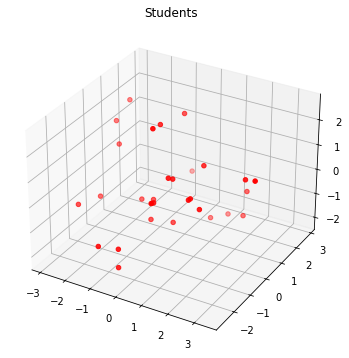

In [73]:
# Plot in 3D the enterprise embeddings
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=3)
pca.fit(complex_graph_student_embeddings)
enterprise_embeddings_pca = pca.transform(complex_graph_student_embeddings)

# NOT a subgraph, just a graph

# Plot the embeddings
from mpl_toolkits.mplot3d import Axes3D
plt.figure(figsize=(20,10))

ax = plt.subplot(1,3,1, projection='3d')
ax.scatter(enterprise_embeddings_pca[:,0], enterprise_embeddings_pca[:,1], enterprise_embeddings_pca[:,2], c="red")

plt.subplot(1,3,1)
plt.title("Students")

plt.show()

In [71]:
# Cluster the enterprise embeddings
from sklearn.cluster import AffinityPropagation, Birch
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

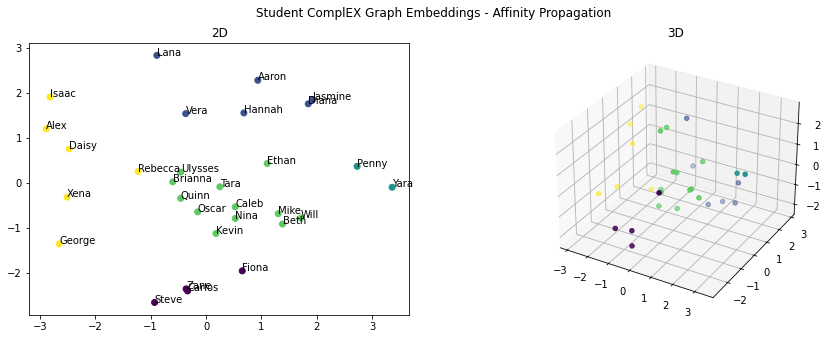

In [93]:
# Use affinity propagation to cluster the embeddings, 2d and 3d on same figure
algorithm = AffinityPropagation()
pca = PCA(n_components=2)
pca.fit(complex_graph_student_embeddings)
enterprise_embeddings_pca_2d = pca.transform(complex_graph_student_embeddings)
algorithm.fit(enterprise_embeddings_pca_2d)

plt.figure(figsize=(15,5))
plt.suptitle("Student ComplEX Graph Embeddings - Affinity Propagation")

plt.subplot(1,2,1)
plt.scatter(enterprise_embeddings_pca_2d[:,0], enterprise_embeddings_pca_2d[:,1], c=algorithm.labels_)
# Add names to the points
for i, txt in enumerate(students):
    plt.annotate(txt, (enterprise_embeddings_pca_2d[i,0], enterprise_embeddings_pca_2d[i,1]))
plt.title("2D")

ax = plt.subplot(1,2,2, projection='3d')
ax.scatter(enterprise_embeddings_pca[:,0], enterprise_embeddings_pca[:,1], enterprise_embeddings_pca[:,2], c=algorithm.labels_)
# Add names to the points
#for i, txt in enumerate(students):
#    ax.text(enterprise_embeddings_pca[i,0], enterprise_embeddings_pca[i,1], enterprise_embeddings_pca[i,2], txt)

plt.title("3D")

plt.show()

In [80]:
# Silhouette score
print("Silhouette score for 2D: ", silhouette_score(enterprise_embeddings_pca_2d, algorithm.labels_))
print("Silhouette score for 3D: ", silhouette_score(enterprise_embeddings_pca, algorithm.labels_))

Silhouette score for 2D:  0.41822177
Silhouette score for 3D:  0.279841


In [84]:
# Calculate distances between two embeddings (cosine similarity)
from sklearn.metrics.pairwise import cosine_similarity
student1 = "Yara"
student2 = "Alex"
index1 = model.get_embeddings([student1])
index2 = model.get_embeddings([student2])
cosine_similarity(index1, index2)

array([[0.01997443]], dtype=float32)

In [85]:
student1 = "Yara"
student2 = "Penny"
index1 = model.get_embeddings([student1])
index2 = model.get_embeddings([student2])
cosine_similarity(index1, index2)

array([[0.5875548]], dtype=float32)

In [88]:
# Get top 10 most similar enterprises (name) to a given enterprise and the similarity score
def getTop10(enterprise):
    embedding = model.get_embeddings([enterprise])
    distances = []
    
    for i in range(len(complex_graph_student_embeddings)):
        other_embedding = complex_graph_student_embeddings[i].reshape(1,300)
        distances.append(cosine_similarity(embedding, other_embedding)[0][0])
    distances = np.array(distances)
    indexes = distances.argsort()[-11:][:1:-1]
    enterprises = df["Name"].tolist()
    top10 = []
    for index in indexes:
        top10.append(enterprises[index])
    return top10[1:], distances[indexes][1:]


In [89]:
getTop10("Yara")

(['Penny', 'Beth', 'Mike', 'Diana', 'Will', 'Jasmine', 'Fiona', 'Oscar'],
 array([0.5875548 , 0.45133534, 0.35246077, 0.33387002, 0.33231685,
        0.3151878 , 0.2964455 , 0.28711763], dtype=float32))